In [13]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_content(pattern, path="."):
    files = os.listdir(path)
    matches = [x for x in files if pattern in x]
    print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None, x=None
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    if x:
        [ax.plot(x, l) for l in lists]
    else:
        [ax.plot(l) for l in lists]
    ax.legend(legend, title=legend_title)
    return ax


In [2]:
val_losses = get_content("val_losses", path="../DEFAULT2")
train_losses = get_content("train_losses", path="../DEFAULT2")
val_metrics = get_content("val_metrics", path="../DEFAULT2")
train_metrics = get_content("train_metrics", path="../DEFAULT2")
duration = get_content("duration", path="../DEFAULT2")

prefix_bnc = "cTrue_f_False-fcnn128"
val_losses_bnc = get_content(f"{prefix_bnc}-val_losses")
train_losses_bnc = get_content(f"{prefix_bnc}-train_losses")
val_metrics_bnc = get_content(f"{prefix_bnc}-val_metrics")
train_metrics_bnc = get_content(f"{prefix_bnc}-train_metrics")
duration_bnc = get_content(f"{prefix_bnc}-duration")

prefix_fnc = "cFalse_f_True-fcnn128"
val_losses_fnc = get_content(f"{prefix_fnc}-val_losses")
train_losses_fnc = get_content(f"{prefix_fnc}-train_losses")
val_metrics_fnc = get_content(f"{prefix_fnc}-val_metrics")
train_metrics_fnc = get_content(f"{prefix_fnc}-train_metrics")
duration_fnc = get_content(f"{prefix_fnc}-duration")


Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-val_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-train_metrics.pickle.npy']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cFalse_f_False-fcnn128-duration.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cTrue_f_False-fcnn128-val_losses.pickle']
Found 1 matches: ['ep20-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl150_model-conv128-bn_cTrue_f_False-fcnn128-train_losses.pickle']
Found 1 matches: ['ep20-optim

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


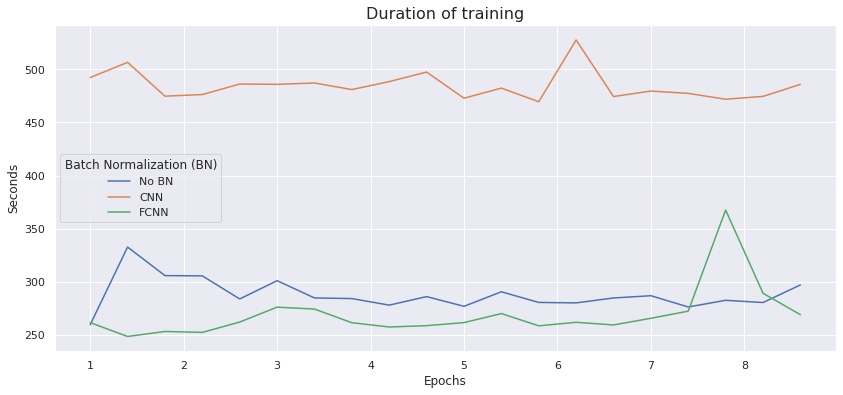

In [3]:
ax = plot_lists([duration, duration_bnc, duration_fnc], legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"])
ax.set_title("Duration of training", fontsize=16)
ax.set_xlabel("Epochs")
ax.set_xticklabels(list(range(len(duration))))
_ = ax.set_ylabel("Seconds")

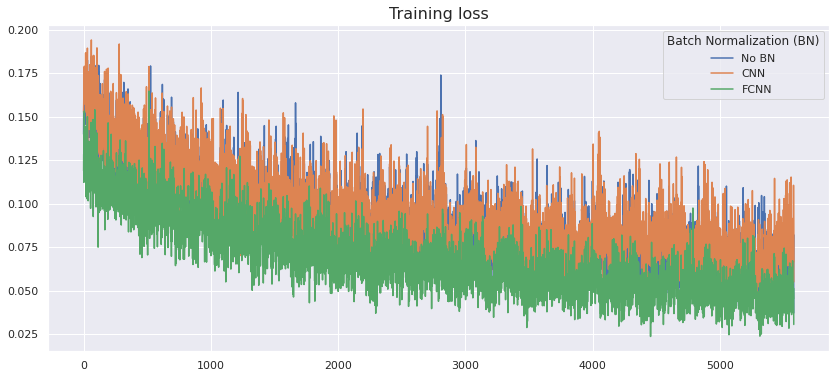

In [4]:
ax = plot_lists([train_losses[500:], train_losses_bnc[500:], train_losses_fnc[500:]], legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"])
_ = ax.set_title("Training loss", fontsize=16)

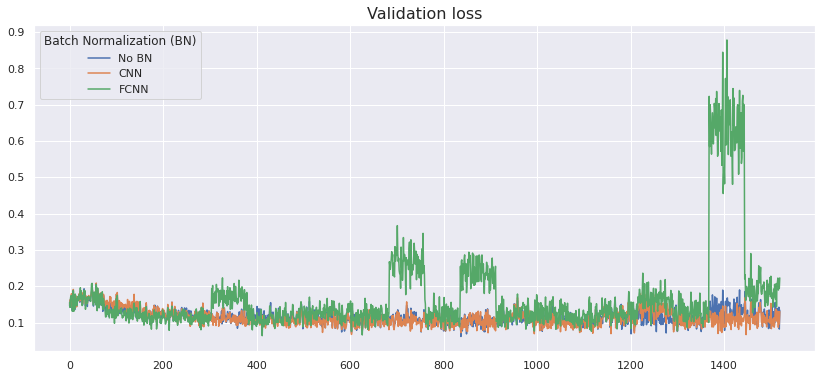

In [5]:
ax = plot_lists([val_losses, val_losses_bnc, val_losses_fnc], legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"])
_ = ax.set_title("Validation loss", fontsize=16)

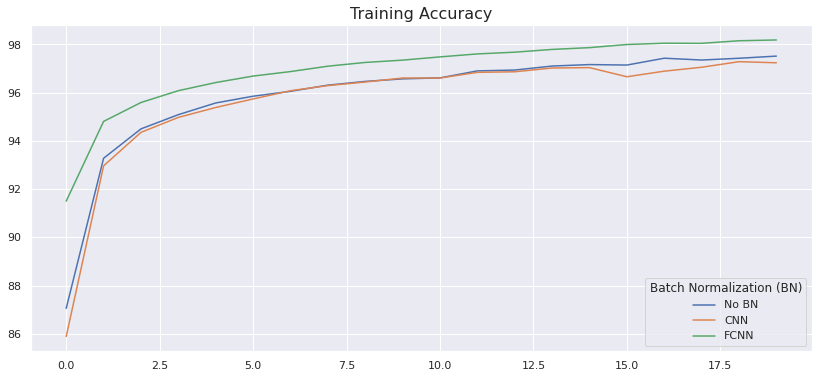

In [6]:
ax = plot_lists([train_metrics[:,0], train_metrics_bnc[:,0], train_metrics_fnc[:,0]], legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"])

_ = ax.set_title("Training Accuracy", fontsize=16)

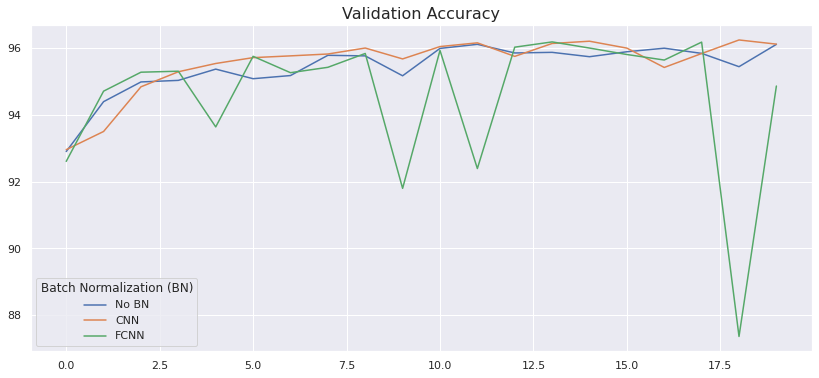

In [7]:
ax = plot_lists([val_metrics[:,0], val_metrics_bnc[:,0], val_metrics_fnc[:,0]], legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"])

_ = ax.set_title("Validation Accuracy", fontsize=16)

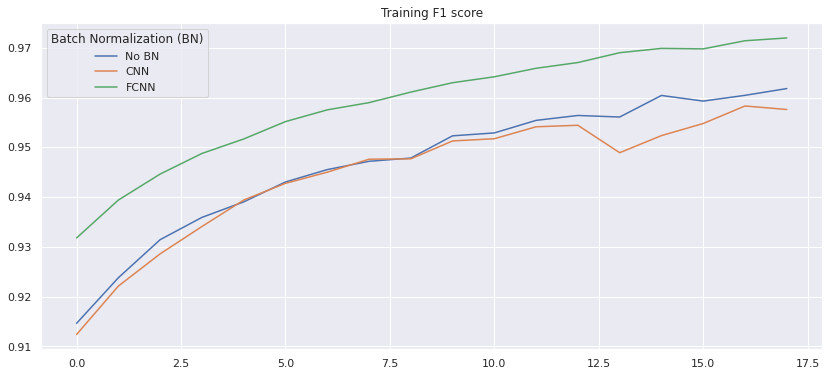

In [10]:
ax = plot_lists([train_metrics[:,1][2:], train_metrics_bnc[:,1][2:], train_metrics_fnc[:,1][2:]], legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"])

_ = ax.set_title("Training F1 score")

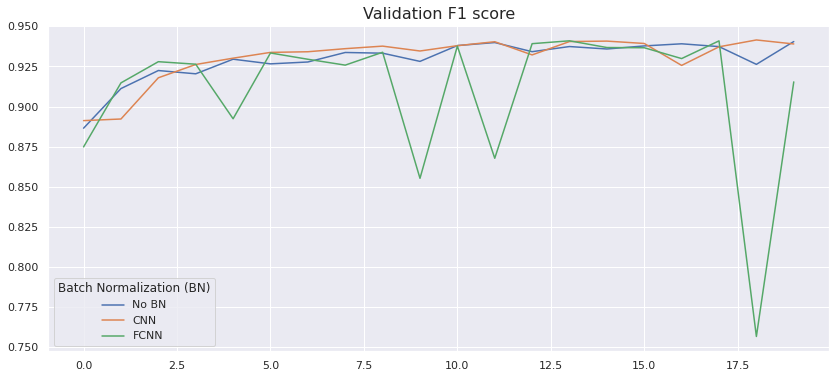

In [9]:
ax = plot_lists([val_metrics[:,1], val_metrics_bnc[:,1], val_metrics_fnc[:,1]], legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"])

_ = ax.set_title("Validation F1 score", fontsize=16)

Text(0, 0.5, 'Epoch training time (s)')

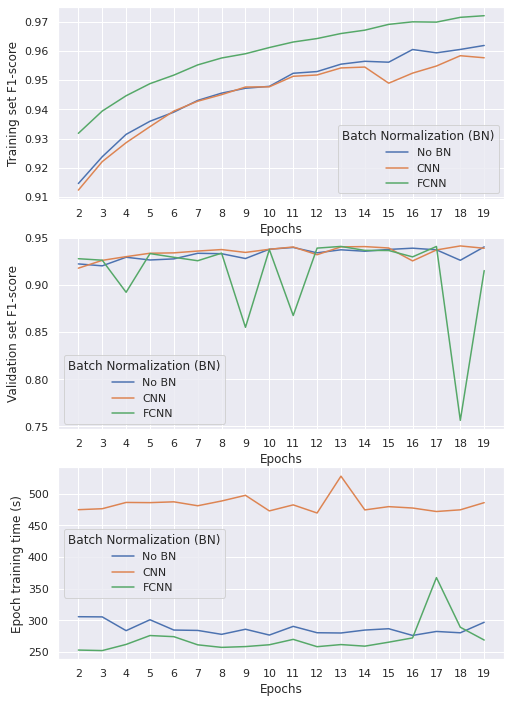

In [22]:
f, ax = plt.subplots(3,1, figsize=(8,12))

plot_lists([train_metrics[:,1][2:], 
                train_metrics_bnc[:,1][2:], 
                train_metrics_fnc[:,1][2:]], 
                legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"],
                ax = ax[0], x = range(2,20))
ax[0].set_xticks(range(2,20))
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Training set F1-score")

plot_lists([val_metrics[:,1][2:], 
                val_metrics_bnc[:,1][2:], 
                val_metrics_fnc[:,1][2:]], 
                legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"],
                ax=ax[1], x = range(2,20))
ax[1].set_xticks(range(2,20))
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Validation set F1-score")

plot_lists([duration[2:], duration_bnc[2:], duration_fnc[2:]], legend_title="Batch Normalization (BN)",
                legend=["No BN", "CNN", "FCNN"], ax=ax[2],x = range(2,20))
ax[2].set_xticks(range(2,20))
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Epoch training time (s)")


In [29]:
df = pd.DataFrame([train_metrics[:,1][2:], 
                train_metrics_bnc[:,1][2:], 
                train_metrics_fnc[:,1][2:]], 
                index=["No BN", "CNN", "FCNN"])
df[[13,14,15,16,17]].mean(axis=1)

No BN    0.959628
CNN      0.954409
FCNN     0.970429
dtype: float64

In [30]:
df = pd.DataFrame([val_metrics[:,1][2:], 
                val_metrics_bnc[:,1][2:], 
                val_metrics_fnc[:,1][2:]], 
                index=["No BN", "CNN", "FCNN"])
df[[13,14,15,16,17]].mean(axis=1)

No BN    0.936245
CNN      0.936572
FCNN     0.895884
dtype: float64